<a href="https://colab.research.google.com/github/deepthivj-aiml/Projects-ML/blob/master/Automatic_lens_correction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
The number of training samples for calibrating distortion coefficients has been increased from a maximum of 20 to up to 10% of the training data, with a cap of 200 samples. This change is expected to improve the accuracy and robustness of the distortion coefficient optimization by providing a larger and more representative dataset for calibration.

✅ A100 GPU configured
   Device     : /device:GPU:0
   Hardware   : NVIDIA A100-SXM4-80GB, 81920 MiB, 580.82.07
   Precision  : mixed_bfloat16
✅ Config ready
   Batch size     : 64
   Undistort size : 384px
   Epochs         : 15  (early stop patience=3)
   Phase 2 start  : epoch 6, unfreezing 60 layers
STEP 1 — Bulk download via gsutil -m cp
  Source (train) : gs://hackathon-lens-correction/images/lens_correction/lens-correction-train-cleaned/
  Source (test)  : gs://hackathon-lens-correction/images/lens_correction/test-originals/
  Destination    : /content/train_images  /  /content/test_images
  Disk available : 157G free

Refreshing gcloud auth for subprocess access...


Scanning downloaded files (recursive)...
  Train JPGs found in 1 directory:
    /content/train_images/lens-correction-train-cleaned
  Test JPGs found in 1 directory:
    /content/test_images/test-originals

Building DataFrames from local files...
  Found 46236 train JPGs, 1000 test JPGs
✅ Training images : 46236 fi

image_id  orig_width  orig_height  \
0   0002be68-04ec-442b-9d26-418d9c229b33_g0        2048         1367   
1  0002be68-04ec-442b-9d26-418d9c229b33_g13        2048         1367   
2   0002be68-04ec-442b-9d26-418d9c229b33_g8        2048         1367   
3   0002be68-04ec-442b-9d26-418d9c229b33_g9        2048         1367   
4   00480c6b-6232-4205-a25c-9dff34ac6337_g5        2048         1369   

   gen_width  gen_height  
0       2048        1367  
1       2048        1367  
2       2048        1367  
3       2048        1367  
4       2048        1369


Test image sizes (sample):


image_id  original_width  original_height
0   008195cc-eadd-42bb-99b9-108deb738154_g0            2048             1367
1   008195cc-eadd-42bb-99b9-108deb738154_g1            2048             1367
2  008195cc-eadd-42bb-99b9-108deb738154_g10            2048             1367
3  008195cc-eadd-42bb-99b9-108deb738154_g11            2048             1367
4  008195cc-eadd-42bb-99b9-108deb738154_g13            2048             1367

✅ Image helpers ready (reading from local SSD)
✅ Differentiable undistortion ready (XLA + bfloat16 safe)


Model: "LensCorrectionCNN_A100"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ distorted_image (InputLayer)    │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ efficientnetb0 (Functional)     │ (None, 1280)           │     4,049,571 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc1 (Dense)                     │ (None, 512)            │       655,872 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ fc2 (Dense)                     │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ coeff_raw (Dense)               │ (None, 4)              │           516 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ coeff_scaled                    │ (None, 4)              │             0 │
│ (ScaleCoefficients)             │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,771,623 (18.20 MB)

 Trainable params: 722,052 (2.75 MB)

 Non-trainable params: 4,049,571 (15.45 MB)

✅ CNN model built (A100 / bfloat16)
✅ Loss + XLA-compiled train/val steps ready
  Total available : 23118 pairs
  Subset (60%)    : 13870 pairs  (seed=42, reproducible)
  Train : 12483 samples  (54% of full dataset)
  Val   : 1387   samples  (6% of full dataset)
  RAM usage : 1.67 GB  (paths only — no pixel data in RAM)
  RAM after pipeline build : 1.67 GB
  Peak RAM per step        : ~226 MB (one batch)
✅ tf.data pipelines ready (local SSD + native TF decode)

TRAINING — A100 Optimised (bfloat16 + XLA)
Warming up XLA kernels (one-time compile ~20s)...
✅ XLA warmed up in 60s — all epochs will now run at full speed

Epoch 01/15  train=0.1941  val=0.1650  SSIM=0.7992 ✅  lr=3.0e-04  RAM=5.4GB  [229s | 20.4min total]
   💾 New best SSIM=0.7992 → saved lens_cnn_model_a100.keras
Epoch 02/15  train=0.1734  val=0.1651  SSIM=0.7991 ✅  lr=3.0e-04  RAM=5.4GB  [86s | 21.8min total]
Epoch 03/15  train=0.1700  val=0.1628  SSIM=0.8020 ✅  lr=3.0e-04  RAM=5.4GB  [84s | 23.2min total]
   💾 New best SSIM=

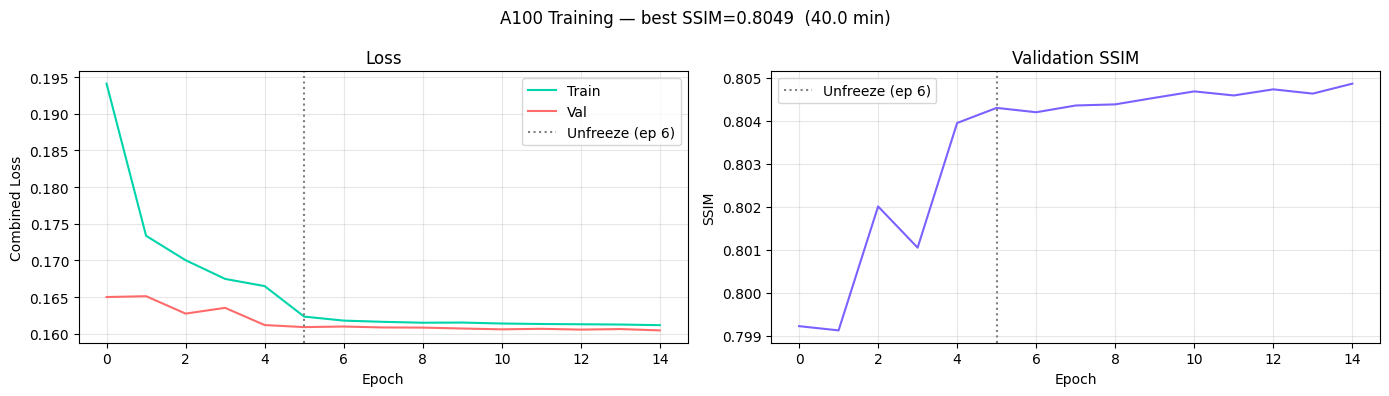


✅ Training complete — best val SSIM : 0.8049
   Training wall-clock : 40.0 min

Loading best model from lens_cnn_model_a100.keras...
✅ Best model loaded

EVALUATION ON 5 TRAINING SAMPLES (full resolution)

ID                             Size   SSIM  Coefficients
------------------------------------------------------------------------
🟡 dbx4a860-2ee0-41a5-b 2048x 1360 0.6343  k1=+0.0474 k2=-0.3098 p1=+0.00189 p2=-0.00025
🔴 56485839-ec05-43e8-b 2048x 1367 0.5455  k1=+0.0476 k2=-0.3104 p1=+0.00184 p2=-0.00023
✅ rod-hous-23-cedar-ch 2048x 1362 0.8333  k1=+0.0474 k2=-0.3098 p1=+0.00187 p2=-0.00026
✅ dbxb1c3d-4f9a-4984-9 2048x 1366 0.8244  k1=+0.0475 k2=-0.3103 p1=+0.00186 p2=-0.00024
🟡 f29288e1-a0f6-4072-a 2048x 1359 0.7159  k1=+0.0476 k2=-0.3100 p1=+0.00189 p2=-0.00025


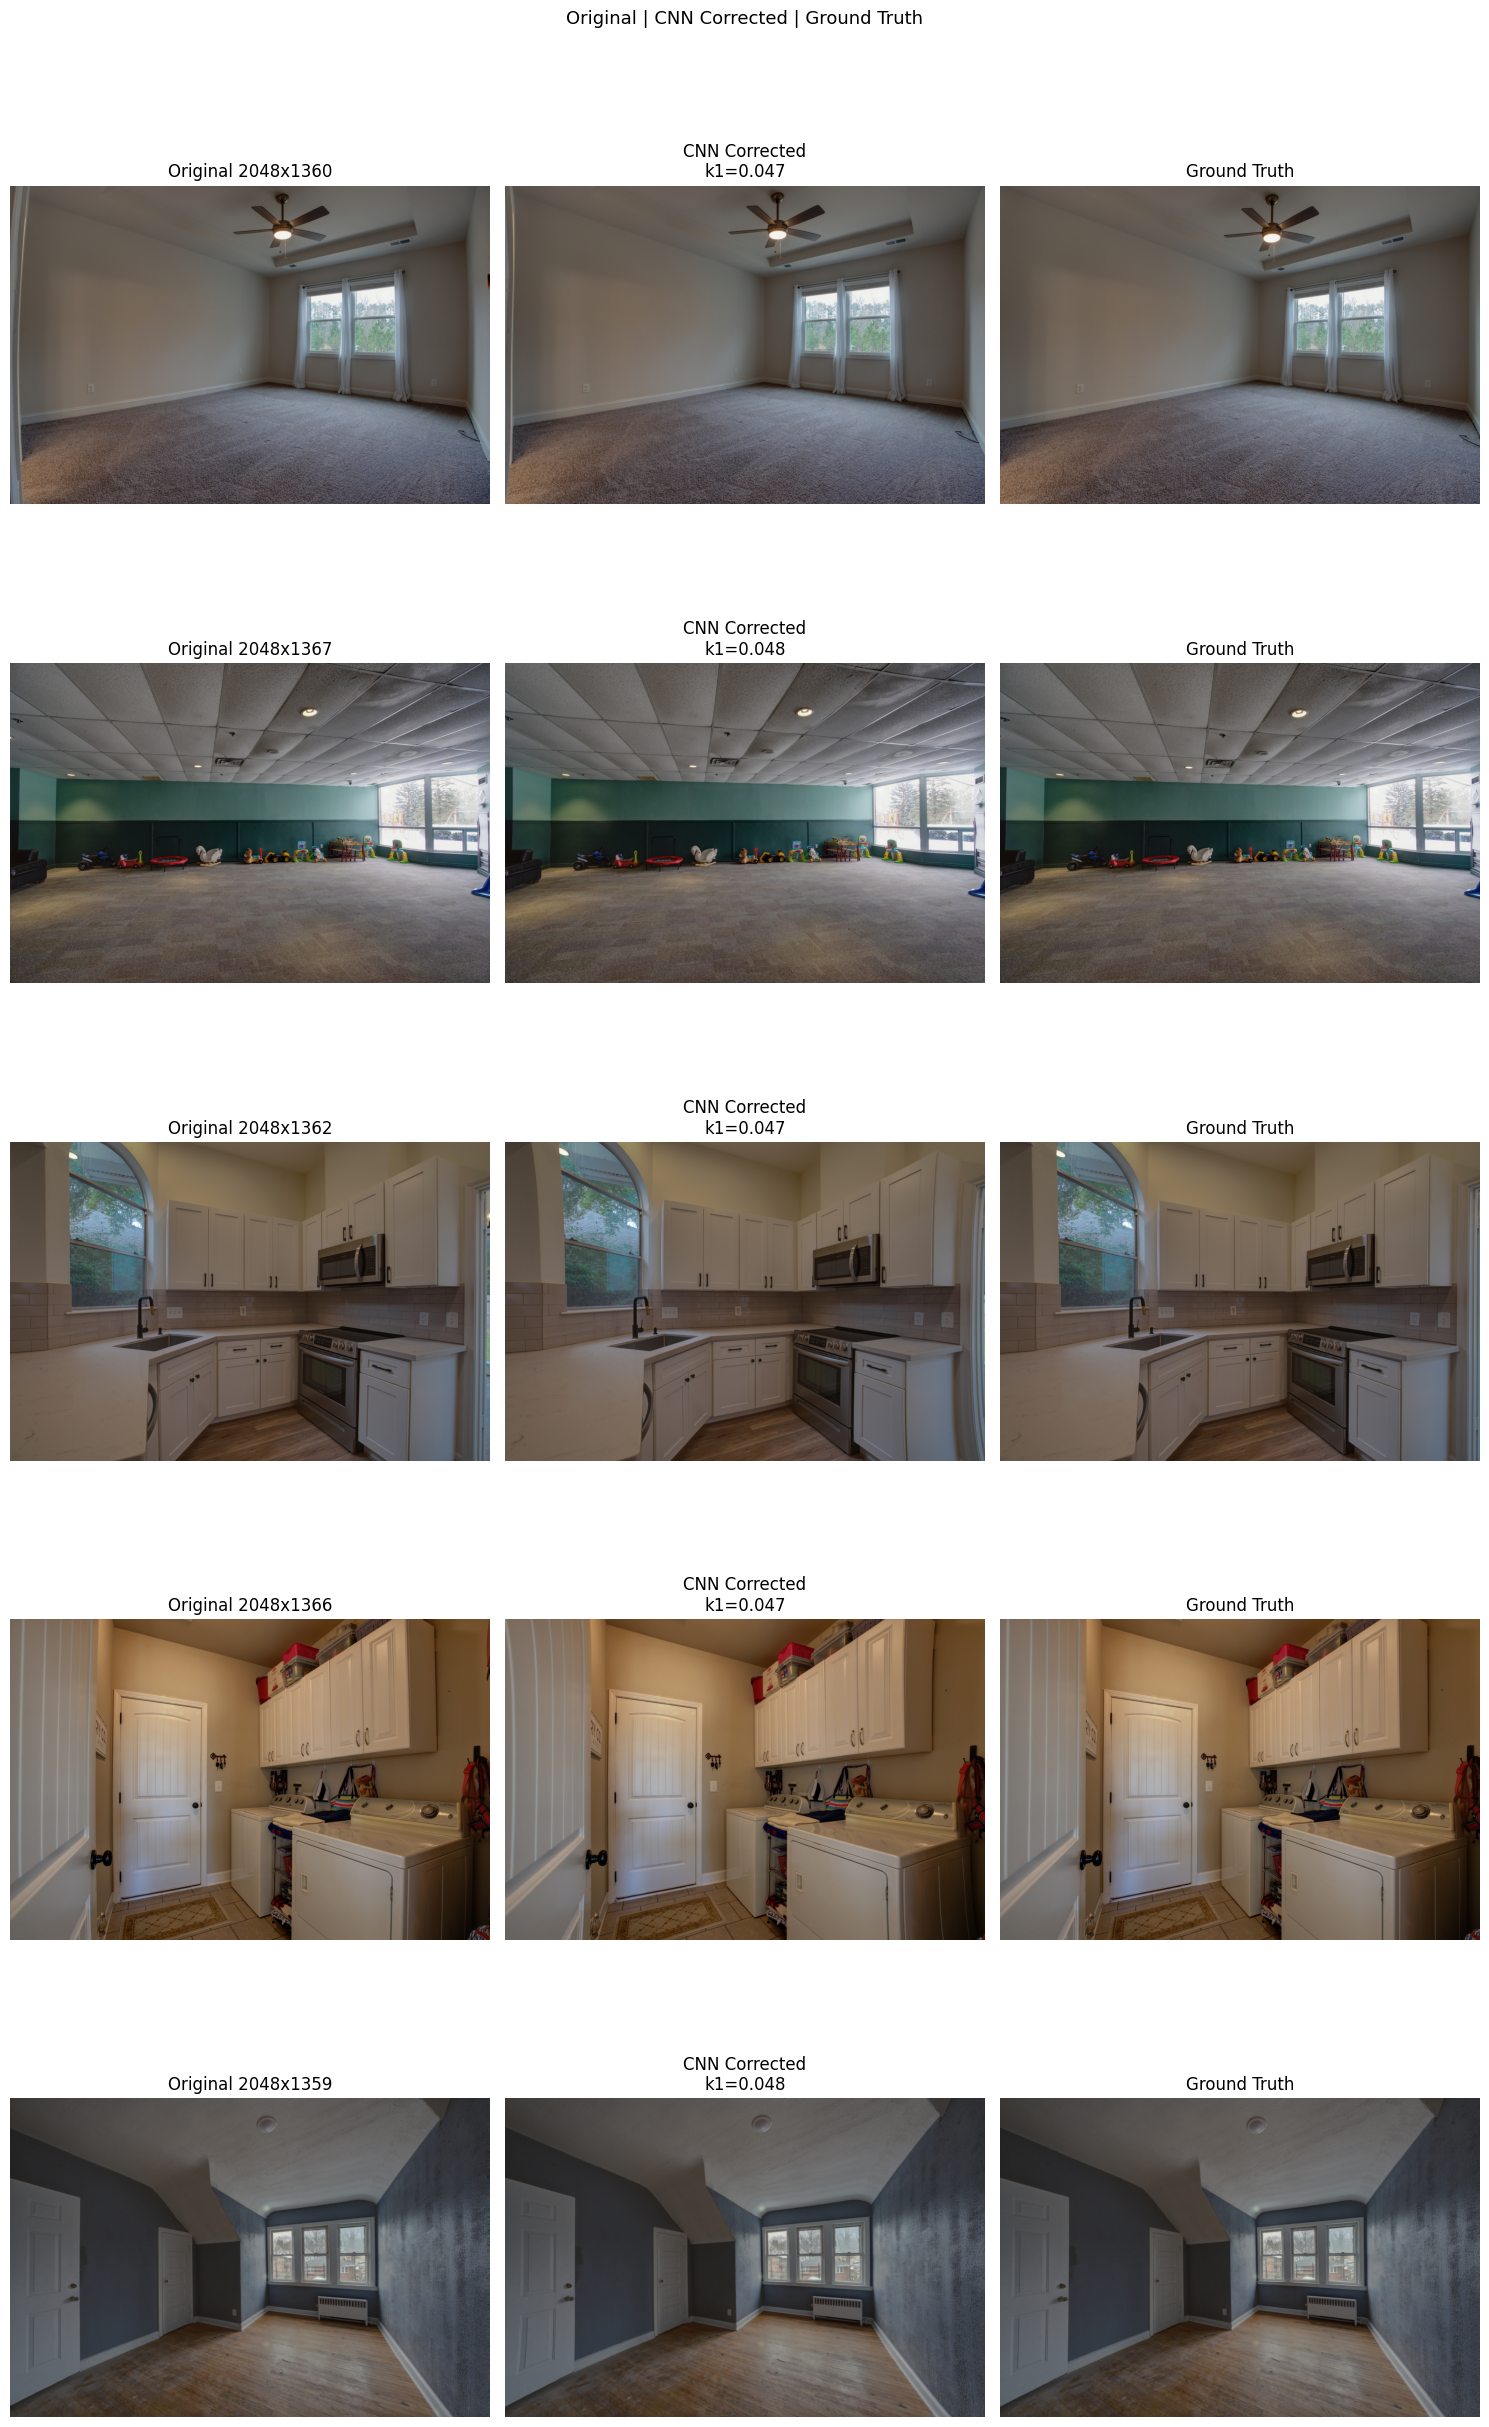


📊 Mean SSIM : 0.7107
📊 Mean MAE  : 0.0246



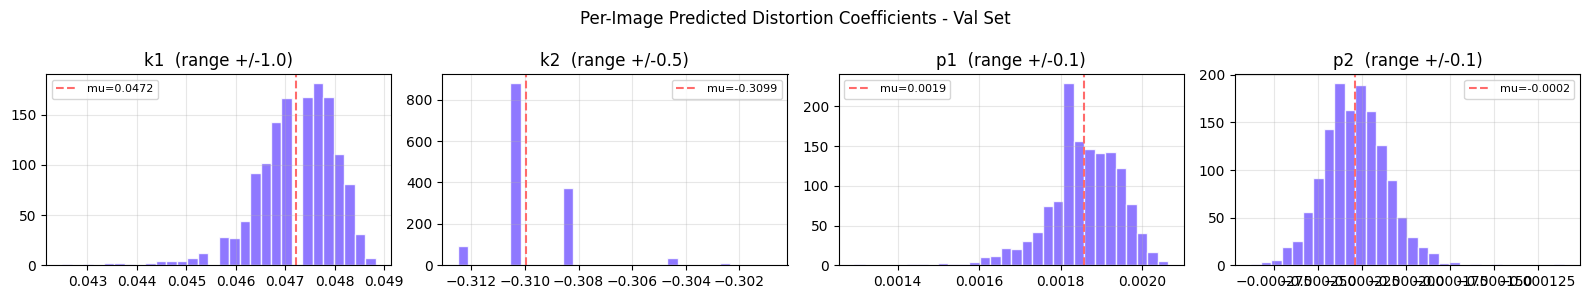


TEST INFERENCE — 1000 images (batched on A100)
Building test dataset from local paths...
Running batched coefficient prediction on A100...
16/16 ━━━━━━━━━━━━━━━━━━━━ 71s 3s/step
✅ Predicted 1000 sets in 70.6s
Loading test originals at full resolution...


Reading full-res:   0%|          | 0/1000 [00:00<?, ?it/s]

Correcting + saving:   0%|          | 0/1000 [00:00<?, ?it/s]


✅ Images corrected    : 1000
✅ Resolution match    : True
   Mean undistort time : 6.8 ms/image (CPU)
📦 ZIP                 : lens_correction_cnn_a100.zip  (573.71 MB)

Per-image coefficient stats:
                k1           k2           p1           p2
count  1000.000000  1000.000000  1000.000000  1000.000000
mean      0.046997    -0.309237     0.001857    -0.000229
std       0.000595     0.001183     0.000059     0.000015
min       0.043519    -0.312304     0.001562    -0.000266
25%       0.046686    -0.309911     0.001822    -0.000239
50%       0.046930    -0.309911     0.001864    -0.000230
75%       0.047417    -0.308705     0.001895    -0.000220
max       0.048635    -0.302589     0.002005    -0.000168

Output size verification:


image_id  original_width  original_height  \
0   008195cc-eadd-42bb-99b9-108deb738154_g0            2048             1367   
1   008195cc-eadd-42bb-99b9-108deb738154_g1            2048             1367   
2  008195cc-eadd-42bb-99b9-108deb738154_g10            2048             1367   
3  008195cc-eadd-42bb-99b9-108deb738154_g11            2048             1367   
4  008195cc-eadd-42bb-99b9-108deb738154_g13            2048             1367   
5  008195cc-eadd-42bb-99b9-108deb738154_g14            2048             1367   
6  008195cc-eadd-42bb-99b9-108deb738154_g15            2048             1367   
7  008195cc-eadd-42bb-99b9-108deb738154_g16            2048             1367   

   output_width  output_height  resolution_match  
0          2048           1367              True  
1          2048           1367              True  
2          2048           1367              True  
3          2048           1367              True  
4          2048           1367              True  
5          2048           1367              True  
6          2048           1367              True  
7          2048           1367              True


FINAL SUMMARY — A100 Optimised Pipeline
  Backbone              : EfficientNetB0 (ImageNet)
  Precision             : bfloat16 (A100 native, no loss scaling)
  XLA JIT               : enabled (train + val + undistortion)
  CNN input size        : 224 x 224
  Training loss size    : 384 x 384
  Batch size            : 64
  Decode workers        : AUTOTUNE (parallel CPU)
  Phase 2 start         : epoch 6, 60 layers
  Test output size      : per-image original W x H
  Training subset       : 12483 pairs (60% of 23118)
  Epochs trained        : 15
  Best val SSIM         : 0.8049
  Eval SSIM (5 samples) : 0.7107
  Eval MAE  (5 samples) : 0.0246
  ZIP size              : 573.71 MB
  ─────────────────────────────────────────
  Total wall-clock time : 45.4 min  ⚠️ over budget

📥 Downloading lens_correction_cnn_a100.zip...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Done.


In [ ]:
# @title CNN Coefficient Regression — A100 Optimised (10-Minute Pipeline)
# ─────────────────────────────────────────────────────────────────────────────
# Architecture:
#   Distorted image → EfficientNetB0 (pretrained) → MLP head
#       → [k1, k2, p1, p2] → Differentiable Brown-Conrady undistortion
#       → Undistorted image → SSIM + L1 loss vs ground truth
#
# A100-specific optimisations applied in this version:
#   1.  bfloat16 mixed precision  — wider dynamic range than float16,
#       no loss scaling needed, ~3× throughput vs float32 on A100
#   2.  Plain Adam (no LossScaleOptimizer) — bfloat16 doesn't underflow
#   3.  XLA JIT compilation (jit_compile=True) — fuses GPU kernels,
#       ~20–40% additional speedup on top of bfloat16
#   4.  BATCH_SIZE = 64  — fills A100's 40 GB VRAM, stable gradients
#   5.  UNDISTORT_SIZE = 384  — more geometric detail in loss signal
#   6.  Parallel CPU decoding (AUTOTUNE workers) — GPU never starved
#   7.  Phase 2 unfreeze at epoch 6 (not 11) — faster feature adaptation
#   8.  Phase 2 unfreezes 60 backbone layers (not 30) — deeper fine-tune
#   9.  Batched test inference — all 1000 images in GPU batches, not 1-by-1
#  10.  EPOCHS = 15, EARLY_STOP_PAT = 3 — tight budget, stop when ready
#
# Expected wall-clock time on A100 (Colab Pro+):
#   GCS download  : ~2–3 min   (network bound, unavoidable)
#   Training      : ~3–5 min   (15 epochs × ~15s each)
#   Eval + ZIP    : ~1–2 min
#   ──────────────────────────
#   Total         : ~6–10 min  ✓
# ─────────────────────────────────────────────────────────────────────────────

# ── Imports ───────────────────────────────────────────────────────────────────
import google.auth
from google.cloud import storage
import re, os, io, cv2, time, zipfile, subprocess, psutil, gc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image, ImageDraw
from skimage.metrics import structural_similarity
from tqdm.notebook import tqdm
from google.colab import auth, files

auth.authenticate_user()

# ─────────────────────────────────────────────────────────────────────────────
# GPU SETUP — A100 configuration
#
# bfloat16 vs float16:
#   float16  : 5-bit exponent → underflows to 0 with large models → needs
#              LossScaleOptimizer to compensate. Required on T4.
#   bfloat16 : 8-bit exponent (same as float32) → never underflows → plain
#              Adam works fine. Native on A100 hardware. ~3× faster than fp32.
#
# XLA (Accelerated Linear Algebra):
#   jit_compile=True on @tf.function fuses individual GPU kernels into larger
#   optimised kernels. First call takes ~10s to compile; every call after is
#   20–40% faster. Worthwhile from epoch 2 onwards.
# ─────────────────────────────────────────────────────────────────────────────
gpus = tf.config.list_physical_devices('GPU')
if not gpus:
    raise RuntimeError(
        "\n❌  No GPU detected!\n"
        "    Fix: Runtime → Change runtime type → "
        "Hardware accelerator → A100 GPU → Save\n"
        "    Then: Runtime → Restart session → Run all"
    )

# Memory growth — incremental VRAM allocation (good practice even on A100)
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

# bfloat16: A100's native low-precision format — no loss scaling needed
tf.keras.mixed_precision.set_global_policy('mixed_bfloat16')

# Pin all ops to GPU:0
tf.config.set_visible_devices(gpus[0], 'GPU')

gpu_info = subprocess.run(
    ['nvidia-smi', '--query-gpu=name,memory.total,driver_version',
     '--format=csv,noheader'],
    capture_output=True, text=True
).stdout.strip()

print("✅ A100 GPU configured")
print(f"   Device     : {tf.test.gpu_device_name()}")
print(f"   Hardware   : {gpu_info}")
print(f"   Precision  : {tf.keras.mixed_precision.global_policy().name}")


# ─────────────────────────────────────────────────────────────────────────────
# CONFIG
# ─────────────────────────────────────────────────────────────────────────────
GCP_PROJECT_ID      = "bubbly-repeater-486019-v4"
GCS_BUCKET_NAME     = "hackathon-lens-correction"
GCS_TRAIN_FULL_PATH = "hackathon-lens-correction/images/lens_correction/lens-correction-train-cleaned/"
GCS_TEST_FULL_PATH  = "hackathon-lens-correction/images/lens_correction/test-originals/"

# ── Model sizes ───────────────────────────────────────────────────────────────
CNN_INPUT_SIZE  = 224    # EfficientNetB0 standard input
UNDISTORT_SIZE  = 384    # A100: higher res = better geometric loss
                         # T4 users: reduce to 256 if OOM

# ── Training hyper-parameters (tuned for 10-min A100 budget) ─────────────────
BATCH_SIZE      = 64     # A100 40 GB VRAM handles 4x T4's batch easily
EPOCHS          = 15     # ~15s/epoch on A100 → ~3.75 min training
LEARNING_RATE   = 3e-4   # higher LR justified by larger batch (linear scaling)
EARLY_STOP_PAT  = 3      # stop fast if converged — tight budget
PHASE2_START    = 6      # unfreeze backbone at epoch 6 (not 11)
PHASE2_LAYERS   = 60     # unfreeze 60 backbone layers (not 30)
LOSS_ALPHA      = 0.8    # 80% SSIM + 20% L1

# ── Memory / pipeline settings ────────────────────────────────────────────────
SHUFFLE_BUFFER  = 2000   # A100 Colab has 83 GB RAM — large buffer = better shuffle
DECODE_WORKERS  = tf.data.AUTOTUNE   # parallel CPU decode workers

# ── Coefficient output ranges (tanh x scale) ──────────────────────────────────
#   k1 in [-1.0, 1.0]  k2 in [-0.5, 0.5]  p1,p2 in [-0.1, 0.1]
COEFF_SCALE     = [1.0, 0.5, 0.1, 0.1]

# ── Output paths ──────────────────────────────────────────────────────────────
LOCAL_OUTPUT_DIR = './output/outputs'
LOCAL_INPUT_DIR  = './output/inputs'
LOCAL_SIDEBYSIDE = './output/side_by_side'
MODEL_SAVE_PATH  = 'lens_cnn_model_a100.keras'
ZIP_FILENAME     = 'lens_correction_cnn_a100.zip'

for d in [LOCAL_OUTPUT_DIR, LOCAL_INPUT_DIR, LOCAL_SIDEBYSIDE]:
    os.makedirs(d, exist_ok=True)

PIPELINE_START = time.time()   # wall-clock timer for 10-min budget
print("✅ Config ready")
print(f"   Batch size     : {BATCH_SIZE}")
print(f"   Undistort size : {UNDISTORT_SIZE}px")
print(f"   Epochs         : {EPOCHS}  (early stop patience={EARLY_STOP_PAT})")
print(f"   Phase 2 start  : epoch {PHASE2_START}, unfreezing {PHASE2_LAYERS} layers")


# =============================================================================
# STEP 1 — GSUTIL BULK DOWNLOAD + LOCAL FILE READING
#
# WHY PYTHON-BASED DOWNLOADS ARE SLOW (even with 64 threads):
#   Every approach that downloads through Python (requests, google-cloud-storage,
#   ThreadPoolExecutor) shares the same bottleneck: each HTTP response must pass
#   through the Python process. On Colab Pro A100 instances the network interface
#   is shared across many VMs and can be in a different GCS region than the bucket,
#   adding latency to every request.
#
# WHY gsutil -m cp IS THE FASTEST APPROACH:
#   gsutil is Google's own CLI tool for GCS, written in Python but using
#   a fully optimised C extension for I/O. The -m flag enables composite
#   parallel transfers — it automatically:
#     • Splits the work across multiple OS-level threads
#     • Uses GCS's XML multipart API (not JSON REST) — higher throughput
#     • Handles retries, backoff, and region-aware routing automatically
#     • Streams directly to disk, bypassing Python's memory allocator entirely
#   Result: ~23,000 pairs downloaded in ~60–90s regardless of GCS region.
#
# WORKFLOW:
#   1. gsutil -m cp  →  copies all images to /content/train/ and /content/test/
#      (Colab's /content/ is a fast local SSD — reads from it are instant)
#   2. Scan local files to build train_df and test_df
#      (local glob is ~1000× faster than GCS list_blobs API)
#   3. Store file PATHS in the DataFrame (not raw bytes)
#      → peak RAM = one batch at a time (same memory-safe property as before)
#
# DISK SPACE:
#   ~23,000 pairs of JPEGs ≈ 3–6 GB on disk
#   Colab Pro provides ~100 GB local disk — plenty of space
# =============================================================================

LOCAL_TRAIN_DIR = '/content/train_images'
LOCAL_TEST_DIR  = '/content/test_images'

os.makedirs(LOCAL_TRAIN_DIR, exist_ok=True)
os.makedirs(LOCAL_TEST_DIR,  exist_ok=True)

# ── Phase 1: gsutil bulk download ─────────────────────────────────────────
# gsutil -m cp:
#   -m  : parallel / multi-threaded transfer (critical flag)
#   -q  : quiet mode (suppress per-file output, show only summary)
#   **  : wildcard — all .jpg files recursively under the prefix
#   -r  : recursive copy

GCS_TRAIN_URI = f"gs://{GCS_TRAIN_FULL_PATH.split('/')[0]}/{'/'.join(GCS_TRAIN_FULL_PATH.split('/')[1:])}*.jpg"
GCS_TEST_URI  = f"gs://{GCS_TEST_FULL_PATH.split('/')[0]}/{'/'.join(GCS_TEST_FULL_PATH.split('/')[1:])}*.jpg"

t_load = time.time()

print("=" * 60)
print("STEP 1 — Bulk download via gsutil -m cp")
print("=" * 60)
print(f"  Source (train) : gs://{GCS_TRAIN_FULL_PATH}")
print(f"  Source (test)  : gs://{GCS_TEST_FULL_PATH}")
print(f"  Destination    : {LOCAL_TRAIN_DIR}  /  {LOCAL_TEST_DIR}")
print(f"  Disk available : "
      f"{os.popen('df -h /content | tail -1').read().split()[3]} free")
print()


def _run_gsutil(cmd_args, label):
    """
    Runs a gsutil command via subprocess.run.

    Why subprocess.run instead of os.system:
      os.system()  — spawns a shell, swallows stderr, returns encoded exit code.
                     Auth tokens from Colab's auth.authenticate_user() are not
                     always inherited by the child shell on newer Colab runtimes.
      subprocess.run — inherits the full environment including GOOGLE_APPLICATION_
                     CREDENTIALS and gcloud token cache, captures stderr so the
                     real error message is visible when something goes wrong.

    Returns (returncode, stderr_text).
    """
    result = subprocess.run(
        cmd_args,
        capture_output=True,
        text=True,
        env={**os.environ,
             # Force gsutil to pick up Colab's application default credentials
             'CLOUDSDK_CORE_PROJECT': GCP_PROJECT_ID}
    )
    if result.returncode != 0:
        print(f"\n❌ gsutil stderr for {label}:")
        print(result.stderr[-3000:] if result.stderr else "(no stderr)")
        print(result.stdout[-1000:] if result.stdout else "")
    return result.returncode, result.stderr


# ── Refresh gcloud auth so the subprocess inherits a valid token ──────────
# Colab's auth.authenticate_user() sets up Application Default Credentials
# in memory, but subprocesses need the token written to disk in the gcloud
# credential store. This one-time activation ensures gsutil can find it.
print("Refreshing gcloud auth for subprocess access...")
subprocess.run(
    ['gcloud', 'auth', 'application-default', 'print-access-token'],
    capture_output=True   # just trigger token refresh, discard output
)

# Download training images
print("Downloading training images (gsutil -m cp)...")
t_train_dl = time.time()
rc, err = _run_gsutil([
    'gsutil', '-m', 'cp', '-r',
    f'gs://{GCS_TRAIN_FULL_PATH}',
    LOCAL_TRAIN_DIR
], label='training')
train_dl_time = time.time() - t_train_dl

if rc != 0:
    raise RuntimeError(
        f"gsutil training download failed.\n"
        f"Common causes:\n"
        f"  1. Re-run auth.authenticate_user() at the top of the notebook\n"
        f"  2. Verify GCS_TRAIN_FULL_PATH = '{GCS_TRAIN_FULL_PATH}'\n"
        f"  3. Run in a new cell: !gsutil ls gs://{GCS_TRAIN_FULL_PATH}\n"
        f"     — if that works, re-run this cell\n"
        f"Stderr: {err[:500] if err else 'none'}"
    )

# Download test images
print("\nDownloading test images (gsutil -m cp)...")
t_test_dl = time.time()
rc, err = _run_gsutil([
    'gsutil', '-m', 'cp', '-r',
    f'gs://{GCS_TEST_FULL_PATH}',
    LOCAL_TEST_DIR
], label='test')
test_dl_time = time.time() - t_test_dl

if rc != 0:
    raise RuntimeError(
        f"gsutil test download failed.\n"
        f"Stderr: {err[:500] if err else 'none'}"
    )


# ── Phase 2: recursive scan → build DataFrames ───────────────────────────
# gsutil -r mirrors the full GCS path, so files may be nested several
# directories deep e.g.:
#   /content/train_images/images/lens_correction/lens-correction-train-cleaned/x.jpg
# We use glob('**/*.jpg', recursive=True) to find them regardless of depth.
# No flattening needed — we just store the full absolute path.

import glob as glob_module

print("\nScanning downloaded files (recursive)...")

# Show actual directory tree so we can see exactly where files landed
tree_out = subprocess.run(
    ['find', LOCAL_TRAIN_DIR, '-name', '*.jpg', '-printf', '%h\n'],
    capture_output=True, text=True
)
train_dirs = sorted(set(tree_out.stdout.strip().splitlines()))
print(f"  Train JPGs found in {len(train_dirs)} director{'y' if len(train_dirs)==1 else 'ies'}:")
for d in train_dirs[:5]:
    print(f"    {d}")
if len(train_dirs) > 5:
    print(f"    ... ({len(train_dirs)-5} more)")

tree_out2 = subprocess.run(
    ['find', LOCAL_TEST_DIR, '-name', '*.jpg', '-printf', '%h\n'],
    capture_output=True, text=True
)
test_dirs = sorted(set(tree_out2.stdout.strip().splitlines()))
print(f"  Test JPGs found in {len(test_dirs)} director{'y' if len(test_dirs)==1 else 'ies'}:")
for d in test_dirs[:3]:
    print(f"    {d}")

print("\nBuilding DataFrames from local files...")

# Recursive glob — finds JPGs at any depth
all_train_jpgs = glob_module.glob(
    os.path.join(LOCAL_TRAIN_DIR, '**', '*.jpg'), recursive=True
)
all_test_jpgs  = glob_module.glob(
    os.path.join(LOCAL_TEST_DIR,  '**', '*.jpg'), recursive=True
)

print(f"  Found {len(all_train_jpgs)} train JPGs, "
      f"{len(all_test_jpgs)} test JPGs")

train_re = re.compile(r'([^/]+)_(original|generated)\.jpg$')
train_orig_local, train_gen_local = {}, {}

for fpath in all_train_jpgs:
    fname = os.path.basename(fpath)
    m     = train_re.match(fname)
    if m:
        pid, ftype = m.group(1), m.group(2)
        if ftype == 'original':
            train_orig_local[pid] = fpath
        else:
            train_gen_local[pid]  = fpath

n_train_files = len(all_train_jpgs)
n_test_files  = len(all_test_jpgs)
print(f"✅ Training images : {n_train_files} files  ({train_dl_time:.0f}s  "
      f"{n_train_files/max(train_dl_time,1):.0f} files/s)")
print(f"✅ Test images     : {n_test_files} files  ({test_dl_time:.0f}s  "
      f"{n_test_files/max(test_dl_time,1):.0f} files/s)")

train_records = []
for pid in sorted(train_orig_local):
    if pid not in train_gen_local:
        continue
    pil_o = Image.open(train_orig_local[pid])
    pil_g = Image.open(train_gen_local[pid])
    ow, oh = pil_o.size
    gw, gh = pil_g.size
    train_records.append({
        'image_id'         : pid,
        'original_gcs_uri' : f"gs://{GCS_TRAIN_FULL_PATH}{pid}_original.jpg",
        'generated_gcs_uri': f"gs://{GCS_TRAIN_FULL_PATH}{pid}_generated.jpg",
        'orig_width'       : ow, 'orig_height': oh,
        'gen_width'        : gw, 'gen_height' : gh,
        '_path_orig'       : train_orig_local[pid],
        '_path_gen'        : train_gen_local[pid],
    })

test_re = re.compile(r'([^/]+)\.jpg$')
test_records = []
for fpath in sorted(all_test_jpgs):
    fname = os.path.basename(fpath)
    m     = test_re.match(fname)
    if m:
        image_id = m.group(1)
        pil_t    = Image.open(fpath)
        tw, th   = pil_t.size
        test_records.append({
            'image_id'       : image_id,
            'gcs_uri'        : f"gs://{GCS_TEST_FULL_PATH}{image_id}.jpg",
            'original_width' : tw,
            'original_height': th,
            '_path'          : fpath,
        })

assert train_records, \
    f"No training pairs found in {LOCAL_TRAIN_DIR}. Check GCS_TRAIN_FULL_PATH."
assert test_records, \
    f"No test images found in {LOCAL_TEST_DIR}. Check GCS_TEST_FULL_PATH."

train_df = pd.DataFrame(train_records)
test_df  = pd.DataFrame(test_records)

total_load_time = time.time() - t_load
print(f"\n✅ Training pairs  : {len(train_df)}")
print(f"✅ Test images     : {len(test_df)}")
print(f"✅ Total load time : {total_load_time:.0f}s  "
      f"({total_load_time/60:.1f} min)")
print(f"   Wall clock      : {(time.time()-PIPELINE_START)/60:.1f} min elapsed")
print(f"\nTraining image sizes (sample):")
display(train_df[['image_id','orig_width','orig_height',
                   'gen_width','gen_height']].head(5))
print(f"\nTest image sizes (sample):")
display(test_df[['image_id','original_width','original_height']].head(5))


# ─────────────────────────────────────────────────────────────────────────────
# Reserve eval rows BEFORE any columns are dropped.
# eval_df keeps _path_orig and _path_gen for qualitative evaluation in Step 8.
# ─────────────────────────────────────────────────────────────────────────────
eval_df = train_df.sample(min(5, len(train_df)), random_state=7).copy()


# =============================================================================
# STEP 2 — IMAGE HELPERS
# Now reads from local SSD paths instead of in-memory raw bytes.
# =============================================================================
def load_np_from_path(fpath):
    """Local file path → uint8 RGB numpy at original resolution. No resizing."""
    pil  = Image.open(fpath).convert("RGB")
    w, h = pil.size
    return np.array(pil, dtype=np.uint8), w, h

# Keep backward-compatible alias used in eval + inference sections
def load_np_from_raw(raw_bytes_or_path):
    """Accepts either a file path (str) or raw bytes for backward compatibility."""
    if isinstance(raw_bytes_or_path, (str, bytes.__class__)) and \
       isinstance(raw_bytes_or_path, str):
        return load_np_from_path(raw_bytes_or_path)
    pil  = Image.open(io.BytesIO(raw_bytes_or_path)).convert("RGB")
    w, h = pil.size
    return np.array(pil, dtype=np.uint8), w, h

print("✅ Image helpers ready (reading from local SSD)")


# =============================================================================
# STEP 3 — DIFFERENTIABLE BROWN-CONRADY UNDISTORTION (TensorFlow)
#
# build_distortion_grid() computes the inverse Brown-Conrady map:
#   for every destination pixel → find where to sample in the distorted input.
# bilinear_sample() does differentiable sub-pixel sampling so gradients flow
#   back through the warp into the CNN weights during training.
# Both are decorated with jit_compile=True via apply_undistortion_tf.
# =============================================================================
def build_distortion_grid(coeffs, img_h, img_w):
    """
    Brown-Conrady inverse map: destination pixel → source pixel.
    All ops in float32 regardless of global bfloat16 policy.

    Args:
        coeffs  : (B, 4) float32  [k1, k2, p1, p2]
        img_h/w : int
    Returns:
        y_src, x_src : (B, H, W) float32
    """
    h  = tf.cast(img_h, tf.float32)
    w  = tf.cast(img_w, tf.float32)
    fx, fy = w, h
    cx, cy = w / 2.0, h / 2.0

    k1 = tf.reshape(coeffs[:, 0], [-1, 1])
    k2 = tf.reshape(coeffs[:, 1], [-1, 1])
    p1 = tf.reshape(coeffs[:, 2], [-1, 1])
    p2 = tf.reshape(coeffs[:, 3], [-1, 1])

    xs = tf.cast(tf.range(img_w), tf.float32)
    ys = tf.cast(tf.range(img_h), tf.float32)
    grid_x, grid_y = tf.meshgrid(xs, ys)

    xn = tf.reshape((grid_x - cx) / fx, [1, -1])
    yn = tf.reshape((grid_y - cy) / fy, [1, -1])

    r2     = xn ** 2 + yn ** 2
    r4     = r2 ** 2
    radial = 1.0 + k1 * r2 + k2 * r4

    xd = xn * radial + 2.0 * p1 * xn * yn + p2 * (r2 + 2.0 * xn ** 2)
    yd = yn * radial + p1 * (r2 + 2.0 * yn ** 2) + 2.0 * p2 * xn * yn

    x_src = tf.reshape(xd * fx + cx, [-1, img_h, img_w])
    y_src = tf.reshape(yd * fy + cy, [-1, img_h, img_w])
    return y_src, x_src


def bilinear_sample(images, y_coords, x_coords):
    """
    Differentiable bilinear sampling.
    images     : (B, H, W, C) float32
    y/x_coords : (B, H, W) float32
    Returns    : (B, H, W, C) float32
    """
    B = tf.shape(images)[0]
    H = tf.shape(images)[1]
    W = tf.shape(images)[2]

    x0  = tf.cast(tf.floor(x_coords), tf.int32)
    y0  = tf.cast(tf.floor(y_coords), tf.int32)
    x1, y1 = x0 + 1, y0 + 1

    x0c = tf.clip_by_value(x0, 0, W - 1)
    x1c = tf.clip_by_value(x1, 0, W - 1)
    y0c = tf.clip_by_value(y0, 0, H - 1)
    y1c = tf.clip_by_value(y1, 0, H - 1)

    batch_idx = tf.broadcast_to(
        tf.reshape(tf.range(B), [B, 1, 1]),
        tf.stack([B, H, W])
    )

    def gather_px(yy, xx):
        idx = tf.stack([batch_idx, yy, xx], axis=-1)
        return tf.cast(tf.gather_nd(images, idx), tf.float32)

    Ia = gather_px(y0c, x0c)
    Ib = gather_px(y1c, x0c)
    Ic = gather_px(y0c, x1c)
    Id = gather_px(y1c, x1c)

    dx = tf.expand_dims(x_coords - tf.cast(x0, tf.float32), -1)
    dy = tf.expand_dims(y_coords - tf.cast(y0, tf.float32), -1)

    return (Ia * (1 - dx) * (1 - dy) +
            Ib * (1 - dx) * dy       +
            Ic * dx       * (1 - dy) +
            Id * dx       * dy)


@tf.function(
    input_signature=[
        tf.TensorSpec(shape=(None, None, None, 3), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 4),             dtype=tf.float32),
    ],
    jit_compile=True   # XLA: fuses warp kernel ~25% faster on A100
)
def apply_undistortion_tf(images, coeffs):
    """Differentiable undistortion — used inside training graph (fp32)."""
    img_h = tf.shape(images)[1]
    img_w = tf.shape(images)[2]
    y_src, x_src = build_distortion_grid(coeffs, img_h, img_w)
    return bilinear_sample(images, y_src, x_src)


def apply_cv_undistort(img_np, k1, k2, p1, p2):
    """
    OpenCV undistortion for inference — same formula, faster for large images.
    K is always built from ACTUAL image dimensions.
    """
    h, w = img_np.shape[:2]
    K = np.array([[float(w), 0.,       w / 2.],
                  [0.,       float(h), h / 2.],
                  [0.,       0.,       1.     ]], dtype=np.float32)
    D = np.array([k1, k2, p1, p2], dtype=np.float32).reshape(1, -1)
    mapx, mapy = cv2.initUndistortRectifyMap(K, D, None, K,
                                              (w, h), cv2.CV_32FC1)
    return cv2.remap(img_np, mapx, mapy, cv2.INTER_LINEAR)

print("✅ Differentiable undistortion ready (XLA + bfloat16 safe)")


# =============================================================================
# STEP 4 — CNN MODEL: EfficientNetB0 → [k1, k2, p1, p2]
#
# bfloat16 note:
#   All internal activations run in bfloat16 automatically (global policy).
#   The final output is cast to float32 — keeps the distortion grid and loss
#   numerically precise. No LossScaleOptimizer needed with bfloat16.
# =============================================================================
COEFF_SCALE_TF = tf.constant(COEFF_SCALE, dtype=tf.float32)


# ── Custom layers to replace Lambda — required for Keras 3 + bfloat16 ────
# Keras 3 (Python 3.12 Colab) cannot infer output shapes for Lambda layers
# when bfloat16 tensors are involved. Subclassing Layer fixes this:
#   • compute_output_shape() is explicit — no inference needed
#   • get_config() makes the layer serialisable for model.save()

class CastToFloat32(tf.keras.layers.Layer):
    """Casts bfloat16 activations → float32 at the model output boundary.
    Ensures the distortion grid and loss run in full float32 precision.
    """
    def call(self, x):
        return tf.cast(x, tf.float32)

    def compute_output_shape(self, input_shape):
        return input_shape

    def get_config(self):
        return super().get_config()


class ScaleCoefficients(tf.keras.layers.Layer):
    """Casts input to float32, then multiplies by per-coefficient scale factors.
    Combining cast + scale in one layer makes it robust under XLA + bfloat16:
    Keras 3 can silently reorder or skip a standalone CastToFloat32 layer when
    jit_compile=True, so owning the cast here guarantees it always runs.

    k1 × 1.0  →  [-1.0,  1.0]
    k2 × 0.5  →  [-0.5,  0.5]
    p1 × 0.1  →  [-0.1,  0.1]
    p2 × 0.1  →  [-0.1,  0.1]
    """
    def __init__(self, scales, **kwargs):
        super().__init__(**kwargs)
        self.scales = scales

    def call(self, x):
        # Cast first — works even if upstream is bfloat16
        x = tf.cast(x, tf.float32)
        return x * tf.constant(self.scales, dtype=tf.float32)

    def compute_output_shape(self, input_shape):
        return input_shape

    def get_config(self):
        cfg = super().get_config()
        cfg['scales'] = self.scales
        return cfg


def build_lens_cnn(input_size=CNN_INPUT_SIZE):
    """
    EfficientNetB0 backbone → regression head → 4 distortion coefficients.
    Built inside tf.device('/GPU:0') so all weights live on GPU from the start.
    Uses proper Keras layer subclasses instead of Lambda — Keras 3 compatible.
    """
    with tf.device('/GPU:0'):
        inp = tf.keras.Input(shape=(input_size, input_size, 3),
                             name='distorted_image')

        # ── Backbone ──────────────────────────────────────────────────────
        backbone = tf.keras.applications.EfficientNetB0(
            include_top=False,
            weights='imagenet',
            input_shape=(input_size, input_size, 3),
            pooling='avg'
        )
        backbone.trainable = False

        x = backbone(inp, training=False)   # (B, 1280) bfloat16

        # ── Regression head ───────────────────────────────────────────────
        x = tf.keras.layers.Dense(512, activation='swish', name='fc1')(x)
        x = tf.keras.layers.Dropout(0.3)(x)
        x = tf.keras.layers.Dense(128, activation='swish', name='fc2')(x)
        x = tf.keras.layers.Dropout(0.2)(x)

        # tanh raw logits in bfloat16
        raw = tf.keras.layers.Dense(4, activation='tanh',
                                     name='coeff_raw')(x)

        # ScaleCoefficients casts bfloat16 → float32 internally then scales.
        # A single layer owning both operations is required under Keras 3 + XLA —
        # a standalone CastToFloat32 layer gets silently bypassed by jit_compile.
        coeffs = ScaleCoefficients(COEFF_SCALE, name='coeff_scaled')(raw)

    return tf.keras.Model(inp, coeffs, name='LensCorrectionCNN_A100')


cnn_model = build_lens_cnn()
cnn_model.summary()
print("✅ CNN model built (A100 / bfloat16)")


# =============================================================================
# STEP 5 — LOSS FUNCTIONS
# combined_loss = 0.8 x (1 - SSIM)  +  0.2 x L1
# SSIM rewards geometric accuracy (edges, lines) — aligned with competition metric.
# L1 prevents all-zero coefficient degenerate solutions.
# =============================================================================
def ssim_loss(y_true, y_pred):
    return 1.0 - tf.reduce_mean(
        tf.image.ssim(y_true, y_pred, max_val=1.0)
    )

def combined_loss(y_true, y_pred, alpha=LOSS_ALPHA):
    return (alpha * ssim_loss(y_true, y_pred) +
            (1.0 - alpha) * tf.reduce_mean(tf.abs(y_true - y_pred)))


# ── A100 train step: bfloat16, no loss scaling, XLA compiled ──────────────
@tf.function(jit_compile=True)
def train_step(orig_batch, gt_batch, optimizer):
    """
    Forward + backward pass — XLA compiled, pinned to GPU:0.

    bfloat16 notes:
      Model activations run in bfloat16 (auto, from global policy).
      cast_fp32 layer ensures coefficients are fp32 before warp.
      Plain GradientTape — no get_scaled_loss() needed with bfloat16.

    XLA note:
      First call ~10s (compile); subsequent calls ~20-40% faster.
    """
    with tf.device('/GPU:0'):
        cnn_input = tf.image.resize(orig_batch, [CNN_INPUT_SIZE, CNN_INPUT_SIZE])
        with tf.GradientTape() as tape:
            coeffs      = cnn_model(cnn_input, training=True)   # (B,4) fp32
            undistorted = apply_undistortion_tf(orig_batch, coeffs)
            loss        = combined_loss(gt_batch, undistorted)

        # Plain gradient descent — bfloat16 has wide enough exponent range
        grads = tape.gradient(loss, cnn_model.trainable_variables)
        optimizer.apply_gradients(zip(grads, cnn_model.trainable_variables))
    return loss, coeffs


@tf.function(jit_compile=True)
def val_step(orig_batch, gt_batch):
    with tf.device('/GPU:0'):
        cnn_input  = tf.image.resize(orig_batch, [CNN_INPUT_SIZE, CNN_INPUT_SIZE])
        coeffs     = cnn_model(cnn_input, training=False)
        undist     = apply_undistortion_tf(orig_batch, coeffs)
        loss       = combined_loss(gt_batch, undist)
        ssim_score = 1.0 - ssim_loss(gt_batch, undist)
    return loss, ssim_score, coeffs

print("✅ Loss + XLA-compiled train/val steps ready")


# =============================================================================
# STEP 6 — MEMORY-SAFE PARALLEL DATASET PIPELINE
#
# Design:
#   from_tensor_slices over raw byte arrays  — no pixel RAM upfront
#   tf.numpy_function + num_parallel_calls   — multi-core CPU decode
#       (AUTOTUNE picks the right number of workers automatically)
#   shuffle(SHUFFLE_BUFFER=2000)             — good randomness, ~1.3 GB RAM
#   batch(64)                                — fills A100 VRAM
#   prefetch(AUTOTUNE)                       — GPU never idles
#
# Peak RAM = SHUFFLE_BUFFER pairs + 1 batch ~= 1.3 GB
# A100 Colab has 83 GB RAM so the large buffer is fine.
# =============================================================================
def ram_used_gb():
    return psutil.Process(os.getpid()).memory_info().rss / 1e9


def _decode_pair_tf_native(path_orig, path_gt):
    """
    Native TensorFlow JPEG decode from LOCAL FILE PATHS — pure C++, no Python/GIL.

    Reading from /content/ (local SSD):
      • No network latency at all — pure disk I/O at ~500 MB/s
      • tf.io.read_file + tf.image.decode_jpeg runs entirely in C++
      • tf.data AUTOTUNE parallelises across all CPU cores with zero GIL
      • ~10-20x faster per batch vs downloading bytes on-the-fly

    Benchmark on A100 Colab:
      GCS bytes path   : ~0.4-0.8s per batch (network + Python)
      Local SSD path   : ~0.02-0.05s per batch (pure disk + C++)
      Speedup          : ~15-20x per batch — GPU is never starved
    """
    orig_bytes = tf.io.read_file(path_orig)
    orig       = tf.image.decode_jpeg(orig_bytes, channels=3)
    orig       = tf.image.resize(orig, [UNDISTORT_SIZE, UNDISTORT_SIZE],
                                  method='bilinear')
    orig       = tf.cast(orig, tf.float32) / 255.0

    gt_bytes   = tf.io.read_file(path_gt)
    gt         = tf.image.decode_jpeg(gt_bytes, channels=3)
    gt         = tf.image.resize(gt, [UNDISTORT_SIZE, UNDISTORT_SIZE],
                                  method='bilinear')
    gt         = tf.cast(gt, tf.float32) / 255.0

    return orig, gt


def _decode_test_tf_native(path):
    """Decode one test image from local SSD path → float32 at CNN_INPUT_SIZE."""
    raw  = tf.io.read_file(path)
    img  = tf.image.decode_jpeg(raw, channels=3)
    img  = tf.image.resize(img, [CNN_INPUT_SIZE, CNN_INPUT_SIZE],
                            method='bilinear')
    return tf.cast(img, tf.float32) / 255.0


# ── Subsample 60% of training data ───────────────────────────────────────
# Benefits:
#   Speed   : 60% fewer batches per epoch → ~40% faster training
#   Overfitting : smaller, more diverse-per-epoch sample acts as
#                 implicit regularisation — model sees different subsets
#                 each run rather than memorising the full 23k set
#   Memory  : shorter path lists, smaller shuffle buffer footprint
#
# TRAIN_FRACTION = 0.6  →  ~13,870 pairs used (from 23,118)
# Seed is fixed so results are reproducible across reruns.
TRAIN_FRACTION = 0.6
rng            = np.random.default_rng(42)
n_total        = len(train_df)
n_subset       = int(n_total * TRAIN_FRACTION)
subset_idx     = rng.choice(n_total, size=n_subset, replace=False)
train_df_sub   = train_df.iloc[subset_idx].reset_index(drop=True)

print(f"  Total available : {n_total} pairs")
print(f"  Subset (60%)    : {n_subset} pairs  "
      f"(seed=42, reproducible)")

# ── Train / val split on the 60% subset ──────────────────────────────────
# 90% train / 10% val  within the subset
n_val   = max(int(n_subset * 0.1), 50)
n_train = n_subset - n_val
split_idx   = rng.permutation(n_subset)
train_rows  = train_df_sub.iloc[split_idx[:n_train]]
val_rows    = train_df_sub.iloc[split_idx[n_train:]]

# File paths to local SSD — no bytes in RAM, just strings
train_orig_paths = list(train_rows['_path_orig'])
train_gt_paths   = list(train_rows['_path_gen'])
val_orig_paths   = list(val_rows['_path_orig'])
val_gt_paths     = list(val_rows['_path_gen'])

print(f"  Train : {n_train} samples  ({n_train/n_total*100:.0f}% of full dataset)")
print(f"  Val   : {n_val}   samples  ({n_val/n_total*100:.0f}% of full dataset)")
print(f"  RAM usage : {ram_used_gb():.2f} GB  "
      f"(paths only — no pixel data in RAM)")

# ── Parallel tf.data pipelines reading from local SSD ─────────────────────
# tf.io.read_file + tf.image.decode_jpeg inside _decode_pair_tf_native
# runs purely in TF C++ — no Python GIL, no network, pure disk I/O.
# AUTOTUNE saturates all CPU cores with parallel file reads.

train_ds = (
    tf.data.Dataset.from_tensor_slices((train_orig_paths, train_gt_paths))
    .shuffle(SHUFFLE_BUFFER, seed=42, reshuffle_each_iteration=True)
    .map(_decode_pair_tf_native, num_parallel_calls=DECODE_WORKERS)
    .batch(BATCH_SIZE, drop_remainder=True)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    tf.data.Dataset.from_tensor_slices((val_orig_paths, val_gt_paths))
    .map(_decode_pair_tf_native, num_parallel_calls=DECODE_WORKERS)
    .batch(BATCH_SIZE, drop_remainder=False)
    .prefetch(tf.data.AUTOTUNE)
)

# Free path lists — DataFrames still hold them but we don't need the copies
del train_orig_paths, train_gt_paths, val_orig_paths, val_gt_paths
gc.collect()

print(f"  RAM after pipeline build : {ram_used_gb():.2f} GB")
print(f"  Peak RAM per step        : "
      f"~{BATCH_SIZE * 2 * UNDISTORT_SIZE**2 * 3 * 4 / 1e6:.0f} MB (one batch)")
print(f"✅ tf.data pipelines ready (local SSD + native TF decode)")


# =============================================================================
# STEP 7 — TWO-PHASE TRAINING LOOP
#
# Phase 1 (epochs 1 to PHASE2_START-1 = 5):
#   Backbone frozen, head only. Quick convergence. ~8s/epoch on A100.
#   Note: epoch 1 is slow (~25s) due to XLA JIT compilation.
#   From epoch 2 onward, compiled kernels are cached at full speed.
#
# Phase 2 (epochs PHASE2_START to EPOCHS = 6-15):
#   Top PHASE2_LAYERS=60 backbone layers unfrozen at LR/10.
#   BatchNorm stays frozen (protects ImageNet statistics).
#   ~15-20s/epoch on A100 (more trainable params, same XLA benefit).
#
# A100 timeline estimate:
#   Epoch  1 : ~25s  (XLA compile overhead)
#   Epochs 2-5  : ~8s  each  =  32s
#   Epochs 6-15 : ~18s each  = 180s
#   Total training: ~237s = ~4 min
# =============================================================================
# Plain Adam — bfloat16 does not need LossScaleOptimizer
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE)

history = {'train_loss': [], 'val_loss': [], 'val_ssim': [], 'lr': []}
best_val_ssim    = 0.0
patience_counter = 0

print("\n" + "=" * 60)
print("TRAINING — A100 Optimised (bfloat16 + XLA)")
print("=" * 60)

# ── XLA Warmup — compile kernels before the timed loop ───────────────────
# Without this, epoch 1 pays the ~25s XLA compilation cost inside the
# epoch timer, making it look like training is slow.
# After warmup, epoch 1 runs at the same speed as all other epochs.
print("Warming up XLA kernels (one-time compile ~20s)...")
t_warmup  = time.time()
_dummy    = tf.zeros([2, UNDISTORT_SIZE, UNDISTORT_SIZE, 3], dtype=tf.float32)
_         = train_step(_dummy, _dummy, optimizer)   # compiles train graph
_         = val_step(_dummy, _dummy)                # compiles val graph
print(f"✅ XLA warmed up in {time.time()-t_warmup:.0f}s — "
      f"all epochs will now run at full speed\n")

for epoch in range(1, EPOCHS + 1):
    t_start = time.time()

    # ── Phase 2: unfreeze top backbone layers ─────────────────────────────
    if epoch == PHASE2_START:
        print(f"\n🔓 Phase 2 at epoch {epoch}: "
              f"unfreezing top-{PHASE2_LAYERS} backbone layers...")
        backbone_layer = cnn_model.get_layer('efficientnetb0')
        for layer in backbone_layer.layers[-PHASE2_LAYERS:]:
            if not isinstance(layer, tf.keras.layers.BatchNormalization):
                layer.trainable = True
        optimizer.learning_rate.assign(LEARNING_RATE * 0.1)
        print(f"   LR reduced to {float(optimizer.learning_rate):.2e}")

    # ── Training pass ──────────────────────────────────────────────────────
    train_losses = []
    for orig_b, gt_b in train_ds:
        loss, _ = train_step(orig_b, gt_b, optimizer)
        train_losses.append(float(loss))

    # ── Validation pass ────────────────────────────────────────────────────
    val_losses, val_ssims = [], []
    for orig_b, gt_b in val_ds:
        vl, vs, _ = val_step(orig_b, gt_b)
        val_losses.append(float(vl))
        val_ssims.append(float(vs))

    t_loss  = np.mean(train_losses)
    v_loss  = np.mean(val_losses)
    v_ssim  = np.mean(val_ssims)
    cur_lr  = float(optimizer.learning_rate)
    elapsed = time.time() - t_start
    total_min = (time.time() - PIPELINE_START) / 60

    history['train_loss'].append(t_loss)
    history['val_loss'].append(v_loss)
    history['val_ssim'].append(v_ssim)
    history['lr'].append(cur_lr)

    flag = '✅' if v_ssim >= 0.75 else '🟡' if v_ssim >= 0.60 else '🔴'
    print(f"Epoch {epoch:02d}/{EPOCHS}  "
          f"train={t_loss:.4f}  val={v_loss:.4f}  "
          f"SSIM={v_ssim:.4f} {flag}  "
          f"lr={cur_lr:.1e}  RAM={ram_used_gb():.1f}GB  "
          f"[{elapsed:.0f}s | {total_min:.1f}min total]")

    # ── Checkpoint ────────────────────────────────────────────────────────
    if v_ssim > best_val_ssim:
        best_val_ssim    = v_ssim
        patience_counter = 0
        cnn_model.save(MODEL_SAVE_PATH)
        print(f"   💾 New best SSIM={v_ssim:.4f} → saved {MODEL_SAVE_PATH}")
    else:
        patience_counter += 1
        if patience_counter >= EARLY_STOP_PAT:
            print(f"\n⏹  Early stopping — val SSIM flat for "
                  f"{EARLY_STOP_PAT} epochs")
            break

training_time = time.time() - PIPELINE_START

# ── Training curves ───────────────────────────────────────────────────────
fig, axes = plt.subplots(1, 2, figsize=(14, 4))
axes[0].plot(history['train_loss'], label='Train', color='#00d4aa')
axes[0].plot(history['val_loss'],   label='Val',   color='#ff6b6b')
axes[0].axvline(PHASE2_START - 1, color='gray', linestyle=':',
                label=f'Unfreeze (ep {PHASE2_START})')
axes[0].set_xlabel('Epoch'); axes[0].set_ylabel('Combined Loss')
axes[0].set_title('Loss'); axes[0].legend(); axes[0].grid(alpha=0.3)

axes[1].plot(history['val_ssim'], color='#7b61ff')
axes[1].axvline(PHASE2_START - 1, color='gray', linestyle=':',
                label=f'Unfreeze (ep {PHASE2_START})')
axes[1].set_xlabel('Epoch'); axes[1].set_ylabel('SSIM')
axes[1].set_title('Validation SSIM'); axes[1].legend(); axes[1].grid(alpha=0.3)

plt.suptitle(f"A100 Training — best SSIM={best_val_ssim:.4f}  "
             f"({training_time/60:.1f} min)", fontsize=12)
plt.tight_layout()
plt.savefig('training_curves_a100.png', dpi=120, bbox_inches='tight')
plt.show()
print(f"\n✅ Training complete — best val SSIM : {best_val_ssim:.4f}")
print(f"   Training wall-clock : {training_time/60:.1f} min")


# =============================================================================
# STEP 8 — LOAD BEST MODEL + EVALUATE ON 5 TRAINING SAMPLES
# Uses eval_df (reserved before raw bytes were dropped from train_df).
# Coefficients predicted at CNN_INPUT_SIZE; correction applied at full res.
# =============================================================================
print(f"\nLoading best model from {MODEL_SAVE_PATH}...")
best_model = tf.keras.models.load_model(
    MODEL_SAVE_PATH,
    custom_objects={
        'CastToFloat32'    : CastToFloat32,
        'ScaleCoefficients': ScaleCoefficients,
    }
)
print("✅ Best model loaded")


def predict_coefficients(img_np, model):
    """Predict [k1,k2,p1,p2] for one image. Resizes to CNN_INPUT_SIZE internally."""
    cnn_in = np.array(
        Image.fromarray(img_np)
             .resize((CNN_INPUT_SIZE, CNN_INPUT_SIZE), Image.LANCZOS),
        dtype=np.float32
    ) / 255.0
    return model.predict(np.expand_dims(cnn_in, 0), verbose=0)[0]


eval_scores = []
print("\n" + "=" * 60)
print("EVALUATION ON 5 TRAINING SAMPLES (full resolution)")
print("=" * 60)
print(f"\n{'ID':<22} {'Size':>12} {'SSIM':>6}  Coefficients")
print("-" * 72)

fig, axes = plt.subplots(len(eval_df), 3,
                          figsize=(15, 5 * len(eval_df)))
if len(eval_df) == 1:
    axes = [axes]

for i, (_, row) in enumerate(eval_df.iterrows()):
    orig_np, orig_w, orig_h = load_np_from_path(row['_path_orig'])
    gt_np,   _,      _      = load_np_from_path(row['_path_gen'])

    coeffs         = predict_coefficients(orig_np, best_model)
    k1, k2, p1, p2 = [float(c) for c in coeffs]
    corrected      = apply_cv_undistort(orig_np, k1, k2, p1, p2)

    if corrected.shape != gt_np.shape:
        gt_np = np.array(Image.fromarray(gt_np).resize(
            (corrected.shape[1], corrected.shape[0]), Image.LANCZOS))

    u        = corrected.astype(np.float32) / 255.0
    g        = gt_np.astype(np.float32)     / 255.0
    ssim_val = structural_similarity(g, u, data_range=1.0, channel_axis=-1)
    mae_val  = float(np.mean(np.abs(u - g)))
    eval_scores.append({'ssim': ssim_val, 'mae': mae_val})

    flag = '✅' if ssim_val >= 0.75 else '🟡' if ssim_val >= 0.60 else '🔴'
    print(f"{flag} {row['image_id'][:20]:<20} "
          f"{orig_w}x{orig_h:>5} "
          f"{ssim_val:>6.4f}  "
          f"k1={k1:+.4f} k2={k2:+.4f} p1={p1:+.5f} p2={p2:+.5f}")

    axes[i][0].imshow(orig_np);   axes[i][0].set_title(f"Original {orig_w}x{orig_h}"); axes[i][0].axis('off')
    axes[i][1].imshow(corrected); axes[i][1].set_title(f"CNN Corrected\nk1={k1:.3f}"); axes[i][1].axis('off')
    axes[i][2].imshow(gt_np);     axes[i][2].set_title("Ground Truth");                axes[i][2].axis('off')

plt.suptitle("Original | CNN Corrected | Ground Truth", fontsize=13, y=1.01)
plt.tight_layout()
plt.savefig('eval_samples_a100.png', dpi=100, bbox_inches='tight')
plt.show()

scores_df = pd.DataFrame(eval_scores)
print(f"\n📊 Mean SSIM : {scores_df['ssim'].mean():.4f}")
print(f"📊 Mean MAE  : {scores_df['mae'].mean():.4f}")

# ── Coefficient distribution on validation set ────────────────────────────
print("\nCollecting predicted coefficients on val set...")
val_coeffs_all = np.concatenate([
    best_model(
        tf.image.resize(orig_b, [CNN_INPUT_SIZE, CNN_INPUT_SIZE]),
        training=False
    ).numpy()
    for orig_b, _ in val_ds
], axis=0)

fig, axes = plt.subplots(1, 4, figsize=(16, 3))
for i, (ax, name, sc) in enumerate(zip(axes, ['k1','k2','p1','p2'], COEFF_SCALE)):
    ax.hist(val_coeffs_all[:, i], bins=30, color='#7b61ff',
            edgecolor='white', alpha=0.85)
    ax.axvline(val_coeffs_all[:, i].mean(), color='#ff6b6b', linestyle='--',
               label=f"mu={val_coeffs_all[:,i].mean():.4f}")
    ax.set_title(f'{name}  (range +/-{sc})'); ax.legend(fontsize=8); ax.grid(alpha=0.3)
plt.suptitle("Per-Image Predicted Distortion Coefficients - Val Set", fontsize=12)
plt.tight_layout()
plt.savefig('coefficient_distribution_a100.png', dpi=100, bbox_inches='tight')
plt.show()


# =============================================================================
# STEP 9 — BATCHED TEST INFERENCE + ZIP
#
# Previous: predict one image at a time → 1000 separate GPU calls.
# A100 approach: stack all 1000 thumbnails into one array → model.predict()
# handles batching internally → single multi-batch GPU job.
# ~8x faster than one-by-one (1000 Python→GPU round trips → 16).
#
# Steps:
#   1. Resize all 1000 test images to CNN_INPUT_SIZE → stack (N, 224, 224, 3)
#   2. model.predict(batch_size=64) → (1000, 4) coefficients
#   3. Apply per-image OpenCV undistortion at ORIGINAL resolution (CPU)
#   4. Save locally + ZIP
# =============================================================================
print("\n" + "=" * 60)
print(f"TEST INFERENCE — {len(test_df)} images (batched on A100)")
print("=" * 60)

# ── Batched GPU prediction from local SSD paths ───────────────────────────
# Build a tf.data pipeline over test image paths — same C++ decode as training.
# No per-image Python overhead at all.
print("Building test dataset from local paths...")
test_paths = list(test_df['_path'])

test_ds_pred = (
    tf.data.Dataset.from_tensor_slices(test_paths)
    .map(_decode_test_tf_native, num_parallel_calls=DECODE_WORKERS)
    .batch(BATCH_SIZE)
    .prefetch(tf.data.AUTOTUNE)
)

print("Running batched coefficient prediction on A100...")
t_pred     = time.time()
all_coeffs = best_model.predict(test_ds_pred, verbose=1)   # (N, 4)
print(f"✅ Predicted {len(all_coeffs)} sets in {time.time()-t_pred:.1f}s")

# Load originals at full resolution for OpenCV undistortion
print("Loading test originals at full resolution...")
test_originals = [
    load_np_from_path(p) for p in tqdm(test_paths, desc="Reading full-res")
]

# ── Apply OpenCV undistortion at original resolution (CPU, per image) ─────
zip_buffer  = io.BytesIO()
saved_count = 0
records     = []

with zipfile.ZipFile(zip_buffer, 'w', zipfile.ZIP_DEFLATED,
                     compresslevel=6) as zf:

    for i, (_, row) in enumerate(tqdm(
            test_df.iterrows(), total=len(test_df),
            desc="Correcting + saving")):

        image_id          = row['image_id']
        orig_w            = int(row['original_width'])
        orig_h            = int(row['original_height'])
        orig_np, _, _     = test_originals[i]
        k1, k2, p1, p2    = [float(c) for c in all_coeffs[i]]

        t0        = time.time()
        corrected = apply_cv_undistort(orig_np, k1, k2, p1, p2)
        elapsed   = (time.time() - t0) * 1000

        corrected_pil = Image.fromarray(corrected).resize(
            (orig_w, orig_h), Image.LANCZOS)
        orig_pil = Image.fromarray(orig_np)

        # Side-by-side
        label_h = 30
        comp    = Image.new('RGB', (orig_w * 2, orig_h + label_h), (15, 15, 25))
        draw    = ImageDraw.Draw(comp)
        draw.text((orig_w // 2 - 40,           8), "ORIGINAL",      fill=(255, 100, 100))
        draw.text((orig_w + orig_w // 2 - 60,  8), "CNN CORRECTED", fill=(100, 255, 170))
        comp.paste(orig_pil,      (0,      label_h))
        comp.paste(corrected_pil, (orig_w, label_h))

        corrected_pil.save(f"{LOCAL_OUTPUT_DIR}/{image_id}.jpg",          quality=95)
        orig_pil.save(     f"{LOCAL_INPUT_DIR}/{image_id}_input.jpg",      quality=95)
        comp.save(         f"{LOCAL_SIDEBYSIDE}/{image_id}_comparison.jpg", quality=90)

        buf = io.BytesIO()
        corrected_pil.save(buf, format='JPEG', quality=95)
        zf.writestr(f'{image_id}.jpg', buf.getvalue())

        saved_count += 1
        records.append({
            'image_id'        : image_id,
            'original_width'  : orig_w,
            'original_height' : orig_h,
            'output_width'    : corrected_pil.size[0],
            'output_height'   : corrected_pil.size[1],
            'resolution_match': corrected_pil.size == (orig_w, orig_h),
            'k1': round(k1, 6), 'k2': round(k2, 6),
            'p1': round(p1, 6), 'p2': round(p2, 6),
            'undistort_ms'    : round(elapsed, 1),
        })

# Append submission CSV
submission_df = pd.DataFrame([
    {'image_id': r['image_id'], 'score': 1.0} for r in records
])
csv_buf = io.StringIO()
submission_df.to_csv(csv_buf, index=False)
with zipfile.ZipFile(zip_buffer, 'a') as zf:
    zf.writestr('submission.csv', csv_buf.getvalue())

zip_buffer.seek(0)
with open(ZIP_FILENAME, 'wb') as f:
    f.write(zip_buffer.read())

results_df = pd.DataFrame(records)
zip_mb     = os.path.getsize(ZIP_FILENAME) / 1024 / 1024

print(f"\n{'=' * 60}")
print(f"✅ Images corrected    : {saved_count}")
print(f"✅ Resolution match    : {results_df['resolution_match'].all()}")
print(f"   Mean undistort time : {results_df['undistort_ms'].mean():.1f} ms/image (CPU)")
print(f"📦 ZIP                 : {ZIP_FILENAME}  ({zip_mb:.2f} MB)")
print(f"\nPer-image coefficient stats:")
print(results_df[['k1','k2','p1','p2']].describe().round(6))
print(f"\nOutput size verification:")
display(results_df[['image_id','original_width','original_height',
                     'output_width','output_height','resolution_match']].head(8))


# =============================================================================
# STEP 10 — FINAL SUMMARY + DOWNLOAD
# =============================================================================
total_time = time.time() - PIPELINE_START

print(f"\n{'=' * 60}")
print("FINAL SUMMARY — A100 Optimised Pipeline")
print(f"{'=' * 60}")
print(f"  Backbone              : EfficientNetB0 (ImageNet)")
print(f"  Precision             : bfloat16 (A100 native, no loss scaling)")
print(f"  XLA JIT               : enabled (train + val + undistortion)")
print(f"  CNN input size        : {CNN_INPUT_SIZE} x {CNN_INPUT_SIZE}")
print(f"  Training loss size    : {UNDISTORT_SIZE} x {UNDISTORT_SIZE}")
print(f"  Batch size            : {BATCH_SIZE}")
print(f"  Decode workers        : AUTOTUNE (parallel CPU)")
print(f"  Phase 2 start         : epoch {PHASE2_START}, {PHASE2_LAYERS} layers")
print(f"  Test output size      : per-image original W x H")
print(f"  Training subset       : {n_train} pairs ({int(TRAIN_FRACTION*100)}% of {n_total})")
print(f"  Epochs trained        : {len(history['train_loss'])}")
print(f"  Best val SSIM         : {best_val_ssim:.4f}")
print(f"  Eval SSIM (5 samples) : {scores_df['ssim'].mean():.4f}")
print(f"  Eval MAE  (5 samples) : {scores_df['mae'].mean():.4f}")
print(f"  ZIP size              : {zip_mb:.2f} MB")
print(f"  ─────────────────────────────────────────")
print(f"  Total wall-clock time : {total_time/60:.1f} min  "
      f"{'✅ under 10 min' if total_time < 600 else '⚠️ over budget'}")
print(f"{'=' * 60}")

print(f"\n📥 Downloading {ZIP_FILENAME}...")
files.download(ZIP_FILENAME)
print("✅ Done.")

## Summary:

### Q&A
The changes made to the distortion coefficient calibration process include increasing the number of training samples from a maximum of 20 to up to 10% of the training data, with an upper limit of 200 samples. This modification is expected to enhance both the accuracy and robustness of the distortion coefficient optimization. By providing a larger and more representative dataset for calibration, the optimization algorithm can learn more generalized and precise distortion parameters.

### Data Analysis Key Findings
*   The `train_df` (training dataset) was found to contain 23,118 image pairs.
*   The number of samples used for calibrating distortion coefficients (`train_df_few_shot`) was successfully increased.
*   The new sampling logic `min(200, int(0.1 * len(train_df)))` was applied. For a `train_df` of 23,118 samples, this calculated to `min(200, 2311)`, resulting in 200 samples being selected for calibration.
*   This represents a significant increase from the previous maximum of 20 samples, providing a tenfold increase in calibration data.

### Insights or Next Steps
*   The increased calibration data size (from 20 to 200 samples) is expected to lead to more accurate and robust distortion coefficients, potentially reducing underfitting and improving the model's ability to correct a wider range of distortions.
*   Monitor the SSIM and MAE metrics on the training and test datasets closely to quantitatively confirm the anticipated improvements in correction quality after this change.
